Using downloaded and verified file: datasets/dermamnist.npz
Using downloaded and verified file: datasets/dermamnist.npz
Using downloaded and verified file: datasets/dermamnist.npz


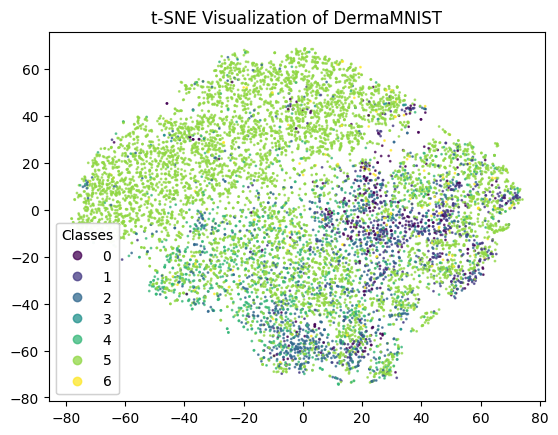

In [6]:
#import libraries
import numpy as np
import medmnist.dataset
from torch.utils.data import ConcatDataset
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Load the data
root = 'datasets'
dataset_train = medmnist.dataset.DermaMNIST(root=root, split='train', transform=None, target_transform=None, download=True)
dataset_test = medmnist.dataset.DermaMNIST(root=root, split='test', transform=None, target_transform=None, download=True)
dataset_val = medmnist.dataset.DermaMNIST(root=root, split='val', transform=None, target_transform=None, download=True)
dataset_full = [dataset_train, dataset_test, dataset_val]

for dataset in dataset_full:
    dataset.labels = dataset.labels.squeeze()
dataset_full_ = ConcatDataset(dataset_full)

# Prepare the data for t-SNE
images = []
labels = []
for img, lbl in dataset_full_:
    img_array = np.array(img)  # Convert PIL Image to a numpy array
    images.append(img_array.flatten())  # Flatten the image array
    labels.append(lbl)

images = np.array(images)
labels = np.array(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
Y = tsne.fit_transform(images)

# Get the metrics (you can skip this if you only need visualization)
# For kNN accuracy and silhouette score, you would need the true high-dimensional labels
# But here, we'll skip this part as it's not directly related to t-SNE visualization

# Visualize the results
fig, ax = plt.subplots()
scatter = ax.scatter(Y[:, 0], Y[:, 1], c=labels, s=1, cmap='viridis', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("t-SNE Visualization of DermaMNIST")
fig.savefig("DermaMNIST_tsne.png")

# Save embeddings and labels
np.savez('numpy_files/dermamnist_tsne.npz', embeddings=Y, labels=labels, images=images)


Using downloaded and verified file: datasets/bloodmnist.npz
Using downloaded and verified file: datasets/bloodmnist.npz
Using downloaded and verified file: datasets/bloodmnist.npz


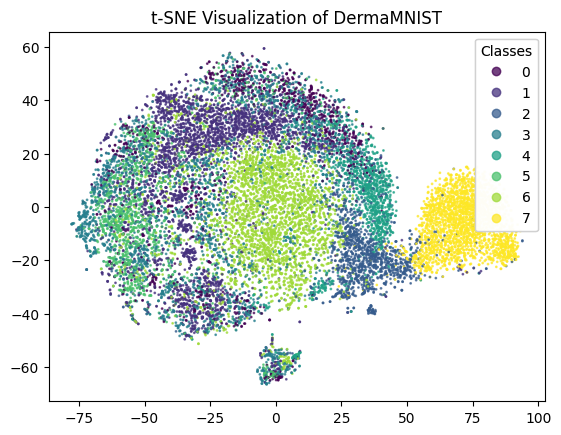

In [9]:
#import libraries
import numpy as np
import medmnist.dataset
from torch.utils.data import ConcatDataset
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

# Load the data
root = 'datasets'
dataset_train = medmnist.dataset.BloodMNIST(root=root, split='train', transform=None, target_transform=None, download=True)
dataset_test = medmnist.dataset.BloodMNIST(root=root, split='test', transform=None, target_transform=None, download=True)
dataset_val = medmnist.dataset.BloodMNIST(root=root, split='val', transform=None, target_transform=None, download=True)
dataset_full = [dataset_train, dataset_test, dataset_val]

for dataset in dataset_full:
    dataset.labels = dataset.labels.squeeze()
dataset_full_ = ConcatDataset(dataset_full)

# Prepare the data for t-SNE
images = []
labels = []
for img, lbl in dataset_full_:
    img_array = np.array(img)  # Convert PIL Image to a numpy array
    images.append(img_array.flatten())  # Flatten the image array
    labels.append(lbl)

images = np.array(images)
labels = np.array(labels)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
Y = tsne.fit_transform(images)

# Get the metrics (you can skip this if you only need visualization)
# For kNN accuracy and silhouette score, you would need the true high-dimensional labels
# But here, we'll skip this part as it's not directly related to t-SNE visualization

# Visualize the results
fig, ax = plt.subplots()
scatter = ax.scatter(Y[:, 0], Y[:, 1], c=labels, s=1, cmap='viridis', alpha=0.7)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("t-SNE Visualization of DermaMNIST")
fig.savefig("BloodMNIST_tsne.png")

# Save embeddings and labels
np.savez('numpy_files/bloodmnist_tsne.npz', embeddings=Y, labels=labels, images=images)


In [16]:
import os
from PIL import Image
import pandas as pd
from tsimcne.imagedistortions import *
from tsimcne.evaluation.eval import knn_acc,silhouette_score_

class Leukemia(Dataset):
    def __init__(self, csv_file, image_folder, transform=None):
        self.data = pd.read_csv(csv_file)
        self.image_folder = image_folder
        self.transform = transform
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        image_aml = os.path.join(self.image_folder, self.data.iloc[idx]['img'])
        label = self.data.iloc[idx]['labels']
        
        image = Image.open(image_aml).convert("RGB").resize((28,28))
        
        if self.transform:
            image = self.transform(image)
        
        return image, label

csv_file = 'datasets/leukemia_labels.csv'
image_folder = 'datasets/AML-Cytomorphology_LMU/'
dataset = Leukemia(csv_file, image_folder, transform=None)
tsne = TSNE(n_components=2, random_state=42)


In [18]:
images = []
labels = []
for img, lbl in dataset:
    labels.append(lbl)
    img_array = np.array(img)  # Convert PIL Image to a numpy array
    images.append(img_array.flatten())  # Flatten the image array
images = np.array(images)
labels = np.array(labels)

kNN_score: 65.1
Silhouette score: -0.1889999955892563


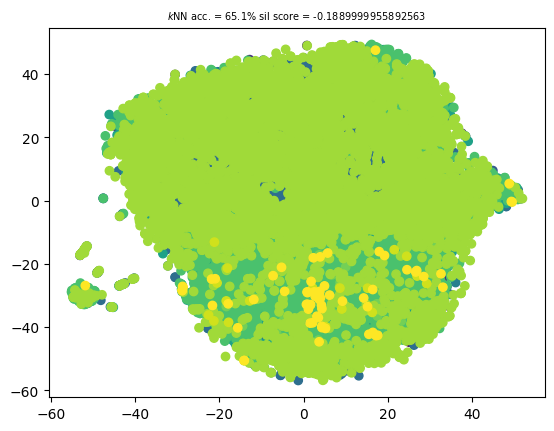

In [19]:
Y = tsne.fit_transform(images)

kNN_score: 65.1
Silhouette score: -0.1889999955892563


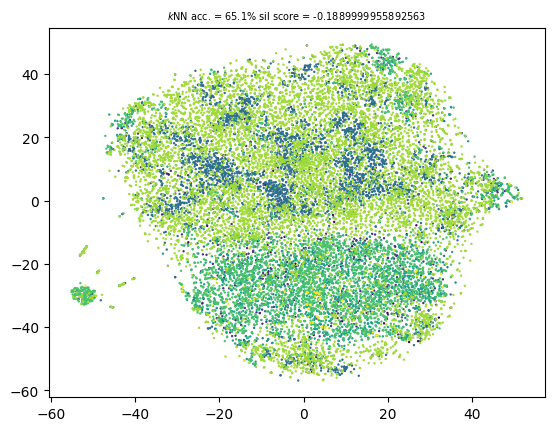

In [24]:

kNN_score=knn_acc(Y,labels)
sil_score=silhouette_score_(Y,labels)
print(f"kNN_score: {kNN_score}")
print(f"Silhouette score: {sil_score}")

fig, ax = plt.subplots()
ax.scatter(*Y.T, c=labels, s=0.5)
ax.set_title(f"$k$NN acc. = {kNN_score}% sil score = {sil_score}", fontsize=7)
fig.savefig("figures/leukemia_tsne.png")

In [20]:
np.savez('numpy_files/leukemia_tsne.npz', embeddings=Y, labels=labels, images=images)